# outliers_detect 패키지 검사

## 목차
### 1. iforest 

# if_outliers class 내의 매소드

## __init__ :초기 설정
- init 을 통해서 파라미터 설정(contamination rate 변수로 받음, 입력 안하면 default 값)

## index: 이상치 index 반환

- init 설정으로 모델 적합시키고->
   데이터 프레임을 받아서 outlier index 값을 list 형으로 반환
- 그런데 categorical 한 것들이 문제가 생겨서, 범주형 변수는 제외하는 df를 새로 만들어서 함

## score: 이상치 score 반환 

- 데이터 프레임을 받아서 outlier score값들을 ndarray형으로 반환
        -score의 range는 [-1,0] 
        -0에 가까울수록 거리가 짧고, anomaly로 감지될 가능성 大

## rate: 이상치 비율 반환
- float 형으로 전체 관측개체 수 중 outlier로 detect된 개체 수의 비율 반환

## visaulize: 이상치 그래프
- index와 이상치 스코어의 관계를 꺾은선으로 나타냄
- 이상치로 판별난 점들을 동그라미로 덧대어 표현함

### 추가되어야 할 것들:
- 

### 의문인 것들:
- categorical 변수들은 어떡하나? 그냥 df에서 제외시켜야 하나?
- 근데 어떤 field를 선택하는 것도 이 패키지에 달려 있어야 하나? 아니면 그냥 선택된 dataframe이 들어오는 건가?


- if_outliers의 객체 x
- iforest_index 매서드를 써서 얻어낸 결과치 y:(이상치로 판별된 index)
- iforest_score 매서들 써서 얻어낸 관측 개체의 anomaly score의 array z
- iforest_visualize 매서드를 써서 얻어낸 그림 


일단 먼저 import 

In [78]:
import outliers_detect as od

In [79]:
dir(od)

['IsolationForest',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'if_outliers',
 'np',
 'pd',
 'plt']

In [80]:
PATH="C:\\Users\\98gud\\Desktop\\pck\\dataset\\"

그 다음에 data set 로드

## dataset에 적용시켜보기-1)

In [81]:

df=od.pd.read_csv(PATH+"creditcard.csv")


In [82]:
display(df.describe())
print(df.columns)
print(df.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [5]:
cols=list(df.columns)

In [6]:
#fig=od.plt.figure(figsize=(20,20))
#for i, col in enumerate(cols):
#    ax=fig.add_subplot(8,4,i+1)
#    ax.set_title(col +" dist",color='DarkRed')
#    od.sns.boxplot(x=df[col])
#    fig.tight_layout()  

In [83]:
x=od.if_outliers()

In [84]:
y=x.if_index(df)

In [85]:
print(y[:5])

[51, 82, 83, 134, 140]


In [86]:
z=x.if_score(df)

In [87]:
print(type(z))

<class 'numpy.ndarray'>


In [88]:
z=od.pd.DataFrame(z,columns=['anomaly_score'])
z.describe()

,anomaly_score
count,284807.000000
mean,-0.404707
std,0.042103
min,-0.777069
25%,-0.421019
50%,-0.395071
75%,-0.375903
max,-0.347085


In [15]:
#import matplotlib.pyplot as plt
#fig=plt.figure(figsize=(30,30))
#plt.plot(df.index,z)
#plt.scatter(y,z[[i for i in y]],edgecolor="k",color="red")
#plt.show()

In [89]:
print(x.if_rate(df))

0.03474282584346593


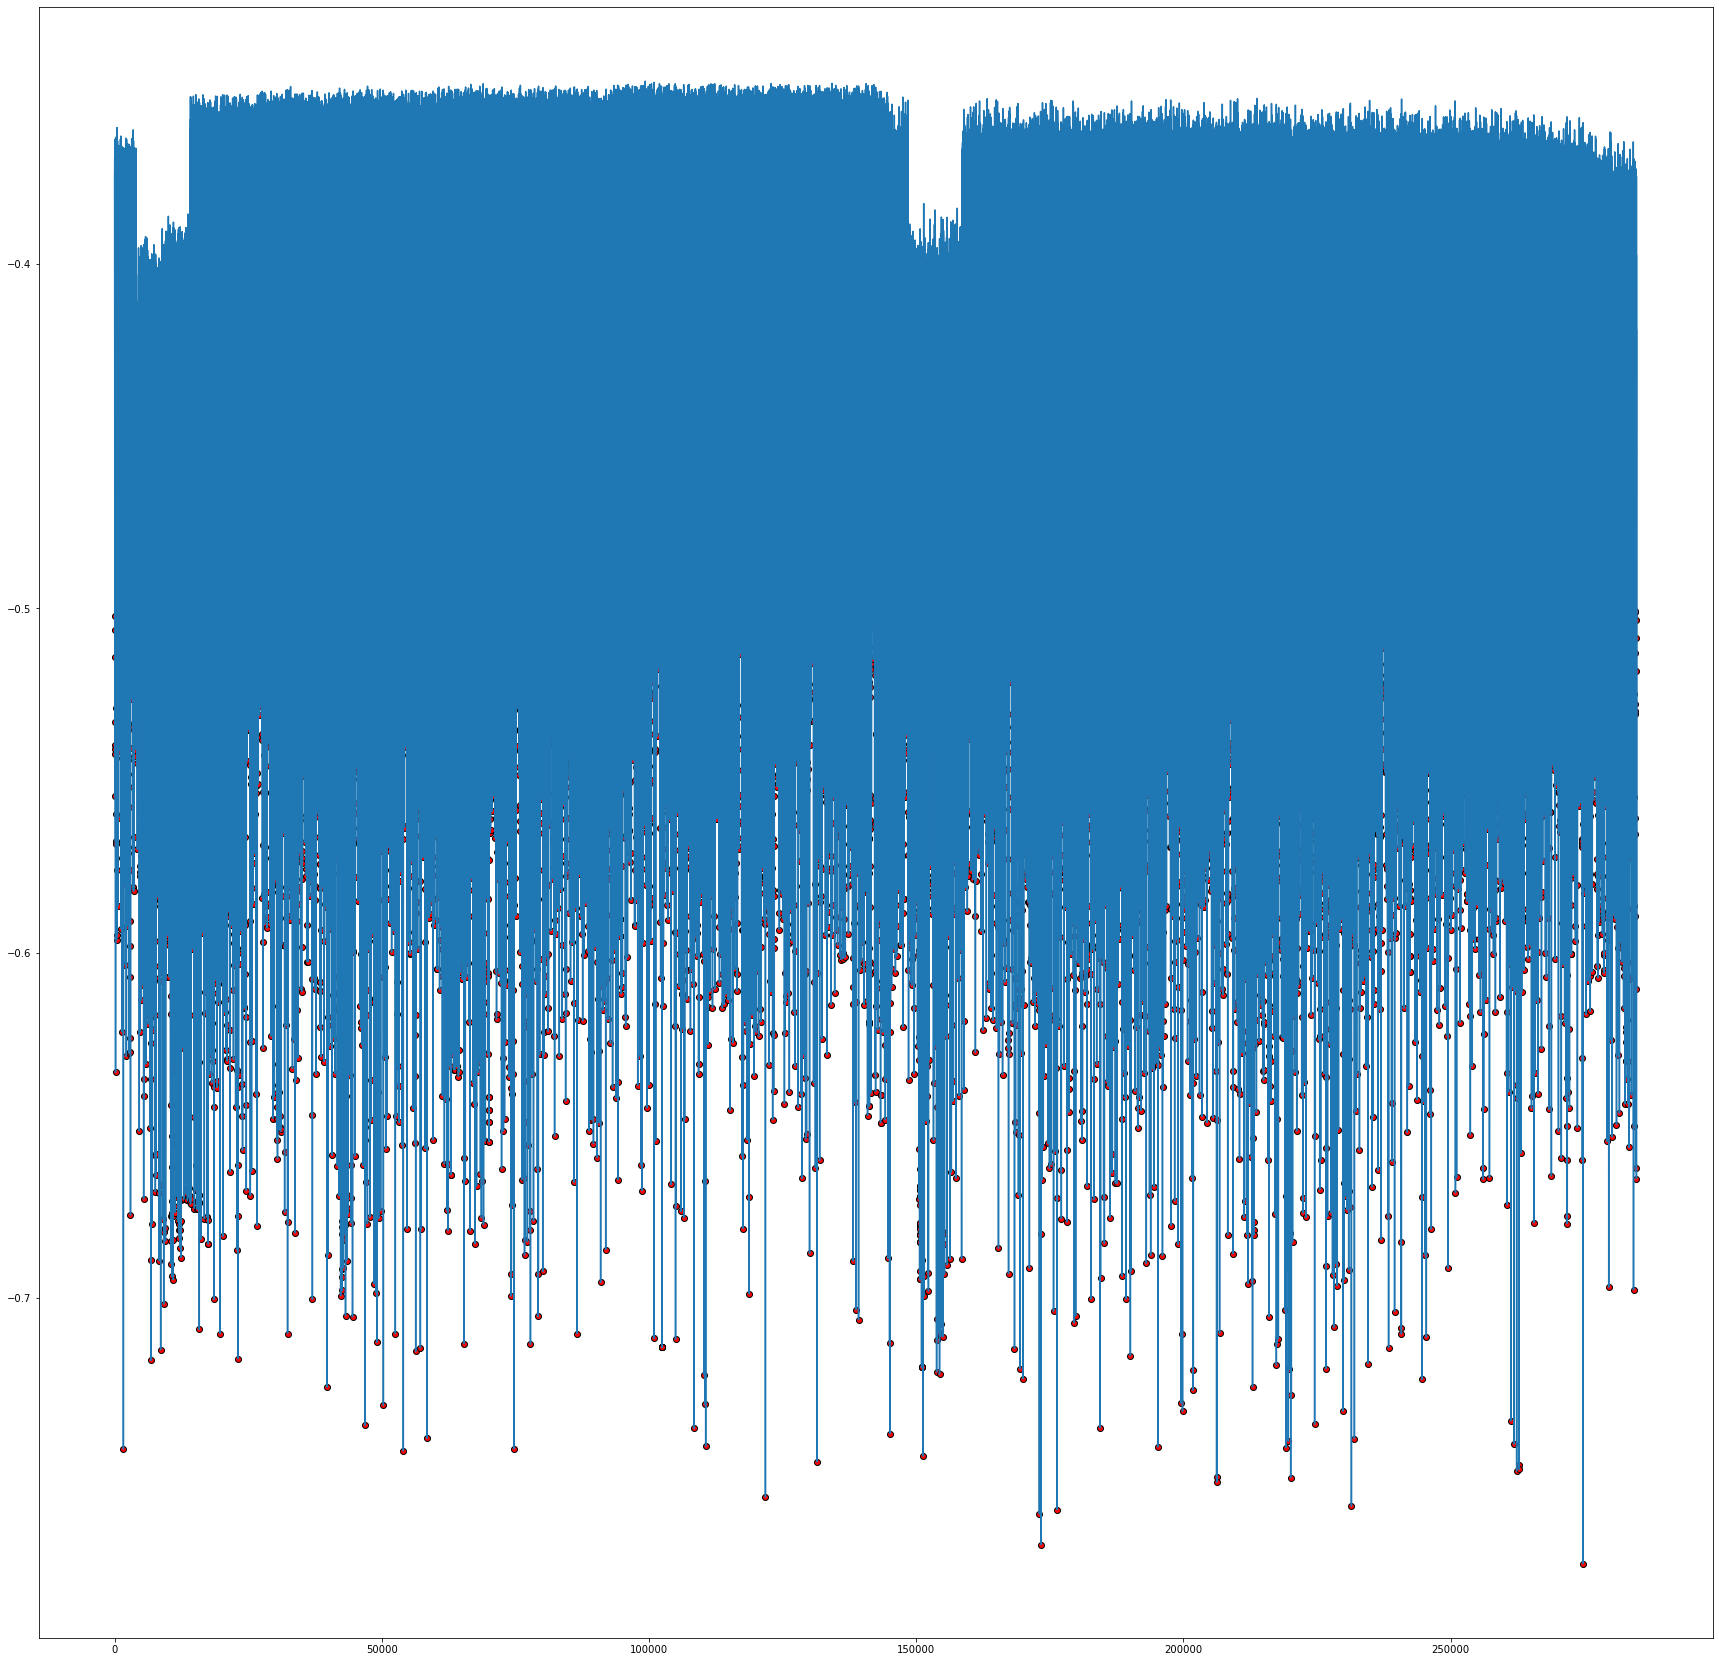

In [90]:
x.if_visualize(df)

## 다른 데이터 셋으로 해보기

### bankrupt 을 예측하는 것
- 이것역시 credit card 데이터 셋처럼 종속변수가 0 또는 1의 값을 가지는 카테고리컬
- 그 외에는 모두 float형


In [91]:
df2=od.pd.read_csv(PATH+"data.csv")

In [92]:
display(df2.describe())
print("df2의 크기: ",df2.shape)
print("df2의 변수들: ", df2.columns)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


df2의 크기:  (6819, 96)
df2의 변수들:  Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth 

In [93]:
display(df2.head())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [95]:
x1=od.if_outliers()
y1=x1.if_index(df2)
z1=x1.if_score(df2)
print(x1.if_rate(df2))


0.012758468983721953


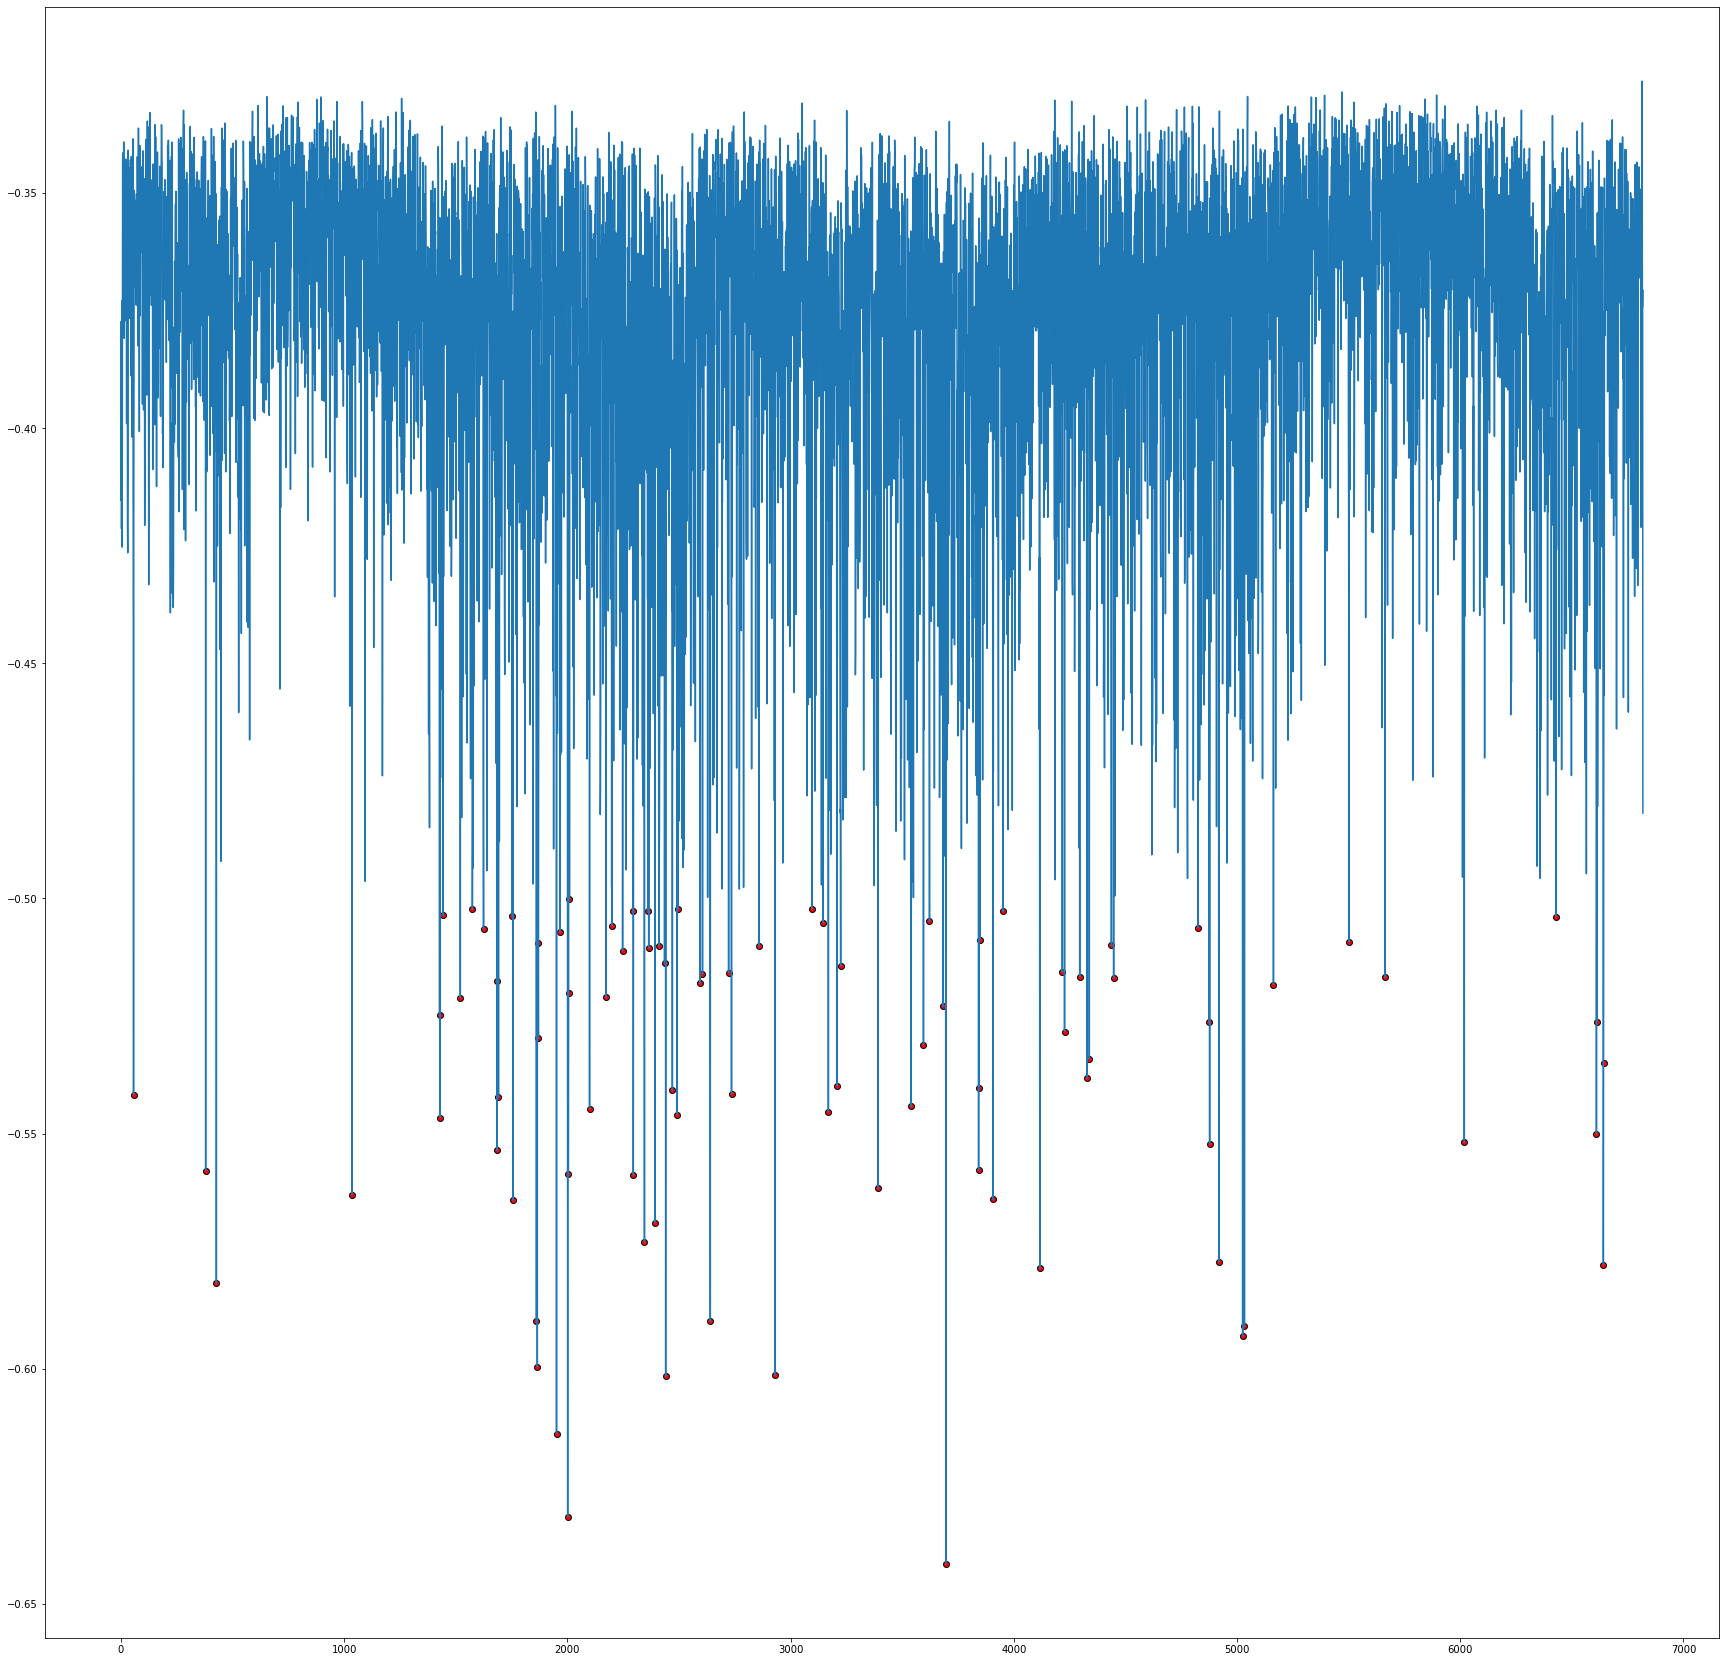

In [96]:
x1.if_visualize(df2)

## 또 다른 데이터 셋

In [97]:
df3=od.pd.read_csv('C:\\Users\\98gud\\Desktop\\pck\\dataset\\gasoline and diesel retail price.csv')

In [98]:
display(df3.describe())
print("df2의 크기: ",df3.shape)
print("df2의 변수들: ", df3.columns)

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


df2의 크기:  (1361, 14)
df2의 변수들:  Index(['Date', 'A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1',
       'P2', 'P3', 'D1'],
      dtype='object')


In [99]:
print(cols)

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

In [100]:
display(df3.head())

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


AttributeError: module 'outliers_detect' has no attribute 'sns'

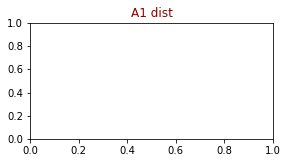

In [101]:
cols=list(df3.columns)
del cols[0]
fig=od.plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    ax=fig.add_subplot(8,4,i+1)
    ax.set_title(col +" dist",color='DarkRed')
    od.sns.boxplot(x=df[col])
    fig.tight_layout()  
od.plt.savefig('boxplot.png')

In [102]:
x2=od.if_outliers()
y2=x2.if_index(df3)
z2=x2.if_score(df3)
print(x2.if_rate(df3))


0.3438648052902278


In [103]:
print(type(z2))
print(z2)

<class 'numpy.ndarray'>
[-0.48718298 -0.48637641 -0.48828435 ... -0.46273547 -0.48201446
 -0.47524769]


In [104]:
print(y2)
print(len(y2))

[30, 31, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 178, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 264, 265, 266, 267, 284, 285, 286, 287, 288, 297, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 353, 354, 363, 364, 365, 377, 378, 413, 414, 415, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 450, 451, 452, 453, 454, 455, 456, 457, 458, 472, 473, 474, 475, 476, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 489, 490, 491, 493, 494, 495, 496, 498, 500, 501, 502, 503, 504, 505, 506, 507, 516, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 531, 557, 644, 645, 646, 647, 648, 649, 654, 671, 672, 673, 674, 678, 679, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 7

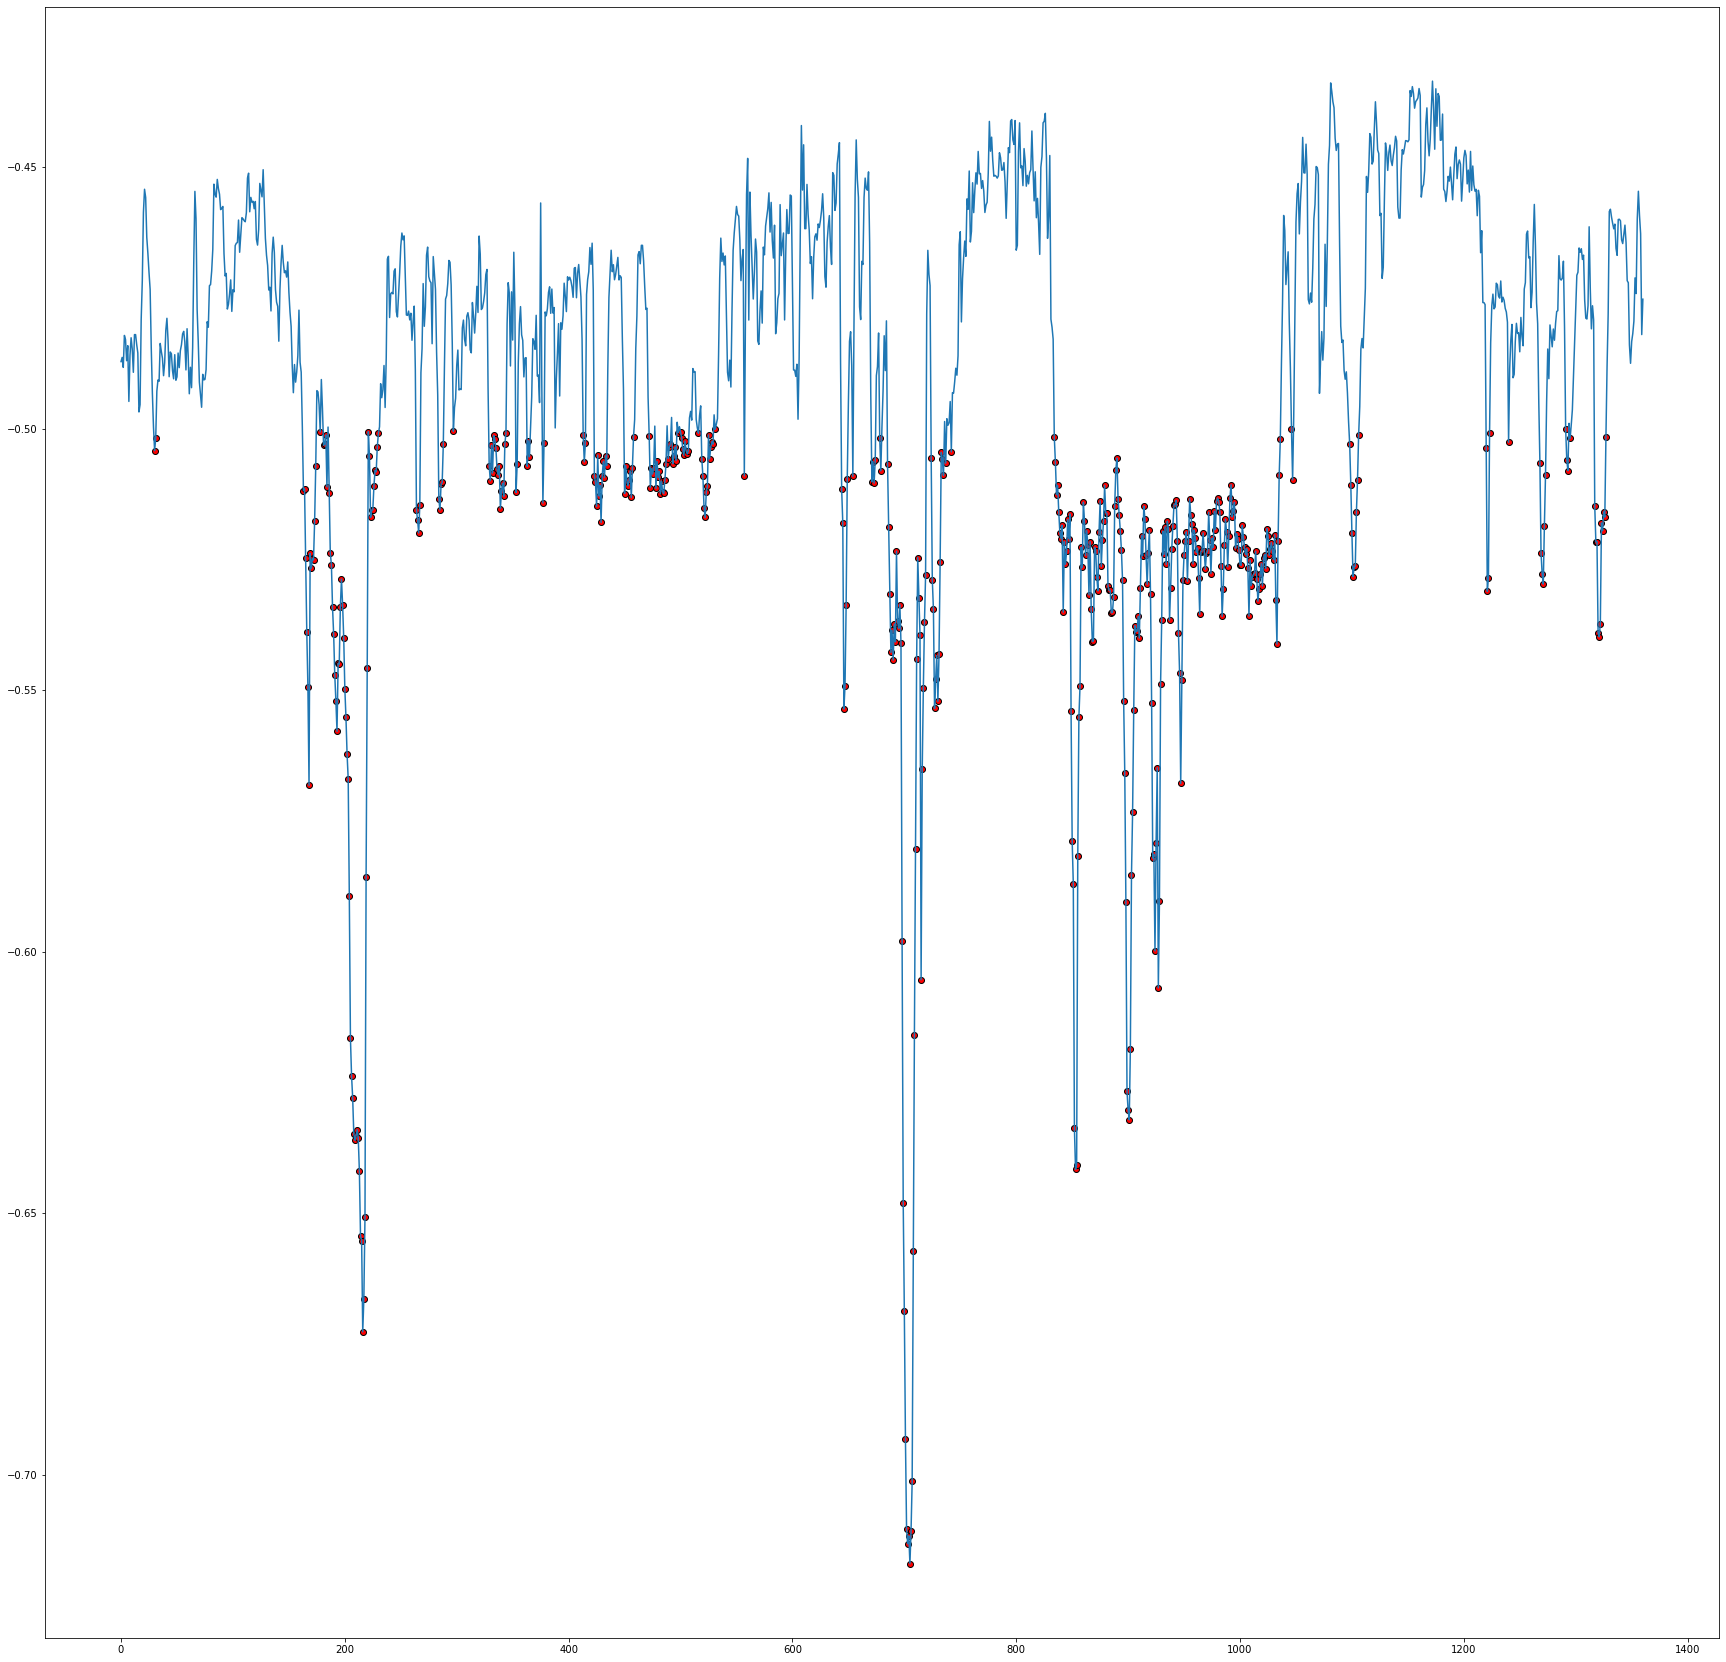

In [78]:
x2.if_visualize(df)

## 또 다른 데이터 셋-시계열 데이터

In [105]:
df_GME=od.pd.read_csv(PATH+"GME_stock.csv")
display(df_GME.head())
print(df_GME.dtypes)
df_GME.describe()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


date               object
open_price        float64
high_price        float64
low_price         float64
close_price       float64
volume            float64
adjclose_price    float64
dtype: object


,open_price,high_price,low_price,close_price,volume,adjclose_price
count,4773.000000,4773.000000,4773.000000,4773.000000,4.773000e+03,4773.000000
mean,23.201005,23.693590,22.714309,23.193234,3.398255e+06,16.882897
std,14.695884,16.210219,13.628194,14.513893,6.547035e+06,11.019953
min,2.850000,2.940000,2.570000,2.800000,6.500000e+04,2.555174
25%,11.360000,11.575000,11.130000,11.350000,1.528900e+06,9.607993
50%,21.760000,22.110001,21.430000,21.760000,2.491800e+06,15.479172
75%,29.420000,30.170000,28.719999,29.430000,3.791600e+06,22.205433
max,354.829987,483.000000,249.000000,347.510010,1.967843e+08,347.510010


In [106]:
df_GME.shape

(4773, 7)

In [107]:
x=od.if_outliers()

In [108]:
y=x.if_index(df_GME)

In [109]:
print(y[:5])

[0, 1, 2, 3, 4]


In [110]:
print(x.if_rate(df_GME))

0.1923318667504714


In [111]:
y=x.if_score(df)

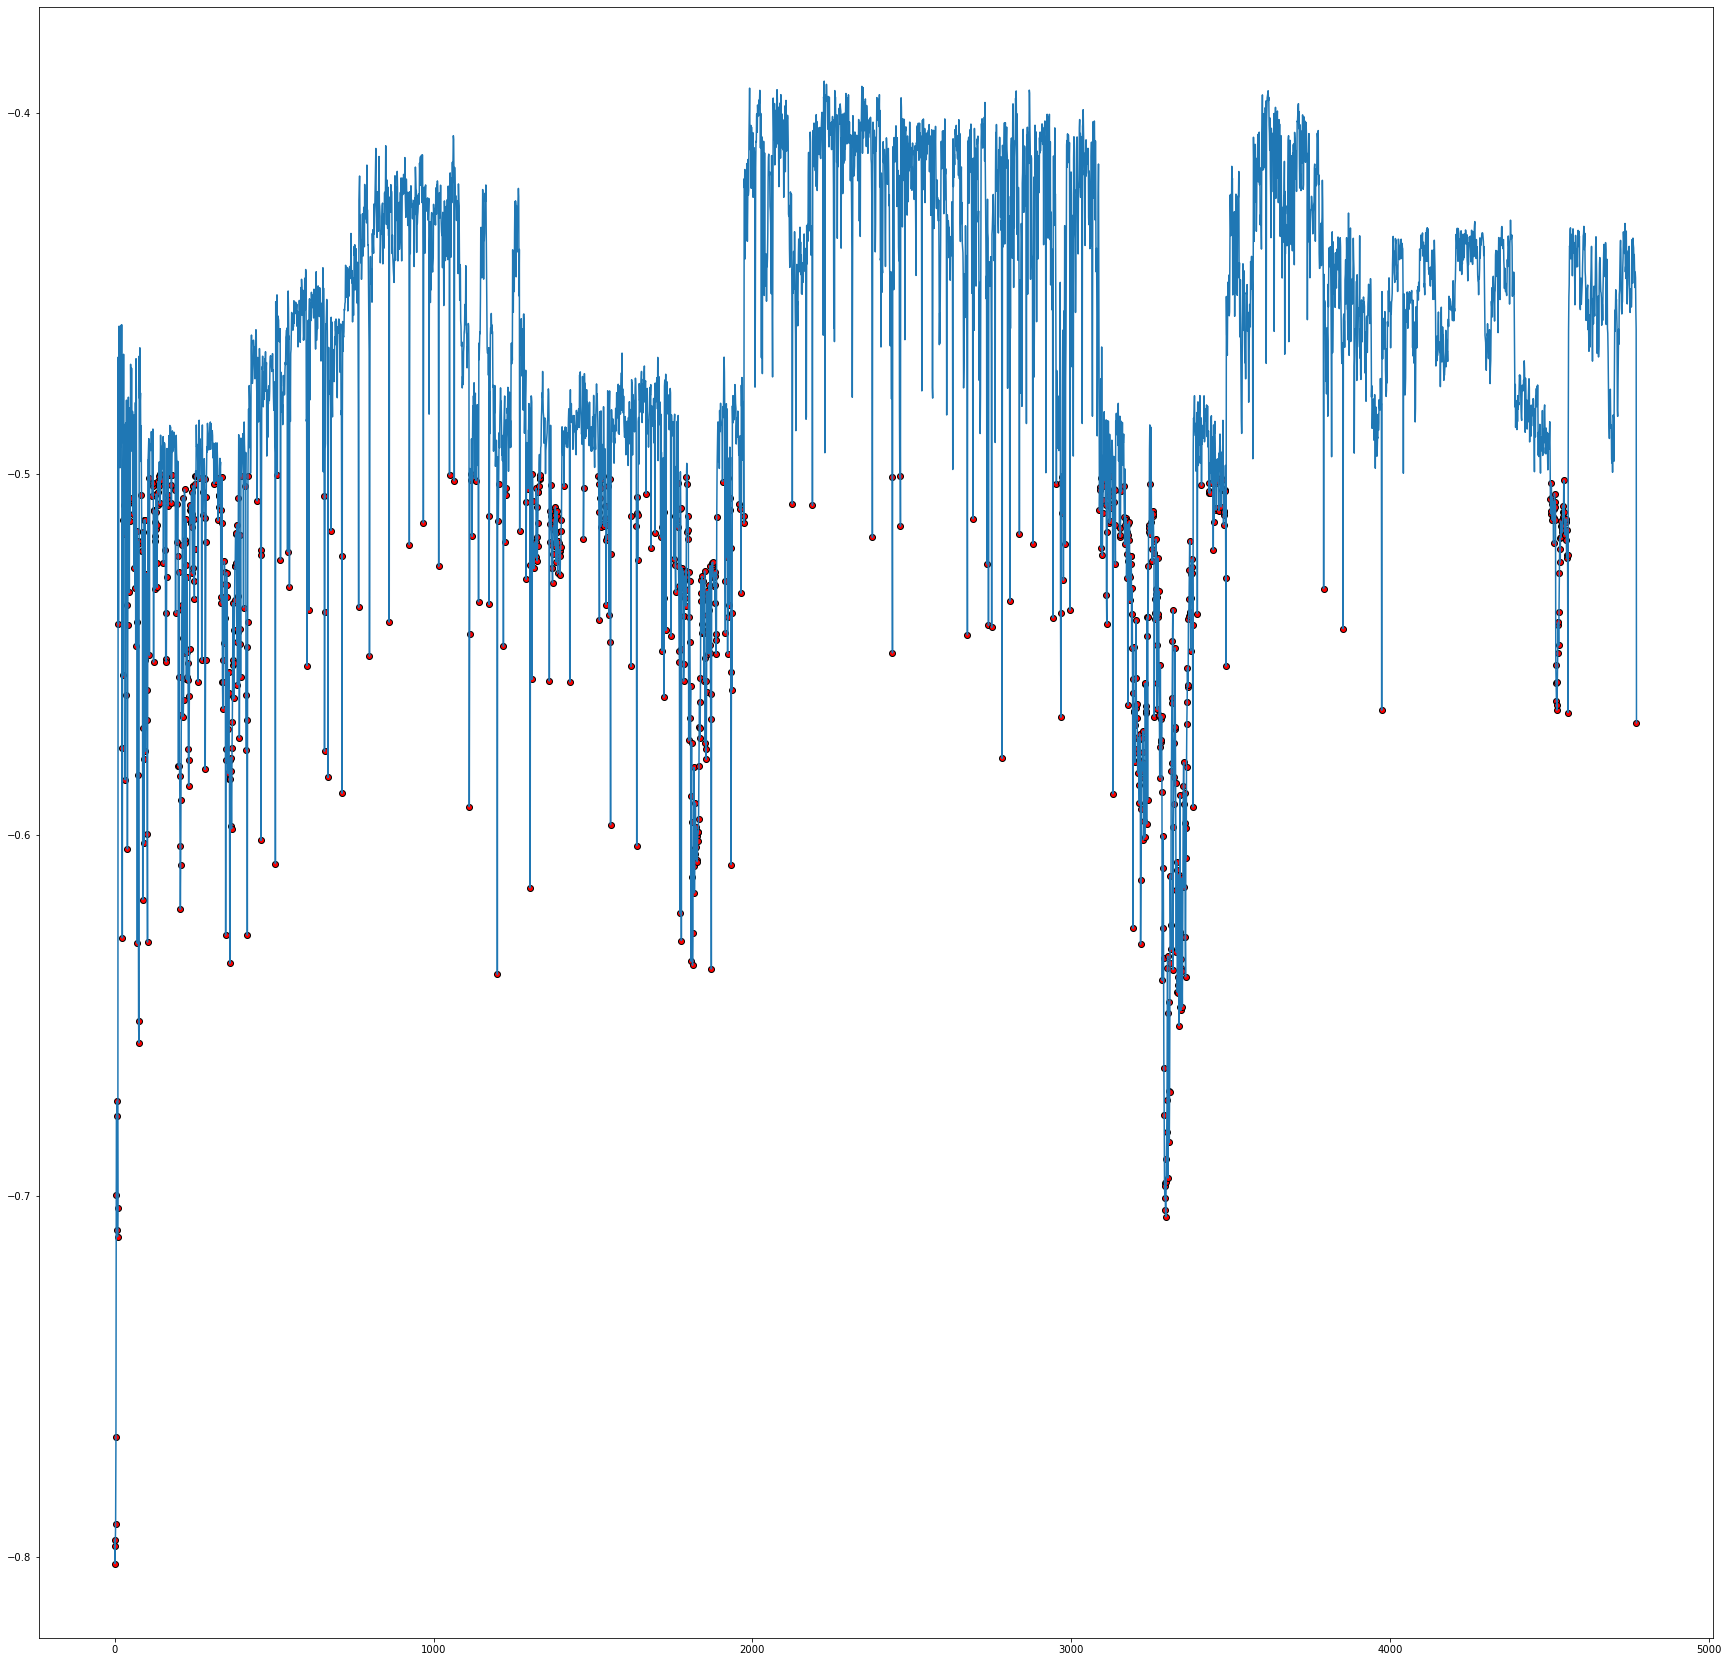

In [112]:
x.if_visualize(df)

## notes

- categorical한 인자들은 못 받아들임
- thresold를 조종할 필요가 있어보임
- 큰 데이터 셋은 꽤 걸림
- 근데 시계열 데이터에서 시간 column을 지워버리면 시계열 데이터의 의미가 잇나? 그러니까 일단 이걸 datetime 형식으로 바꿔보고 해볼께


## 정규분포 대체에 관하여...킵

In [32]:
from sklego.mixture import GMMOutlierDetector

In [33]:
model=GMMOutlierDetector()

In [53]:
#df_GME=df_GME.drop(df_GME[['date']],axis=1)
model.fit(df_GME)

GMMOutlierDetector()

In [54]:
y_pred=model.predict(df_GME)
df_GME=df_GME.assign(y=y_pred)

In [55]:
df_GME['y'].value_counts()

 1    4725
-1      48
Name: y, dtype: int64

In [56]:
gmm_index=df_GME.loc[df_GME['y']==-1].index


In [57]:
print(f"if, gmm의 공통 검출: {len(set(gmm_index).intersection(set(y)))}")

if, gmm의 공통 검출: 0


KeyError: 'y'

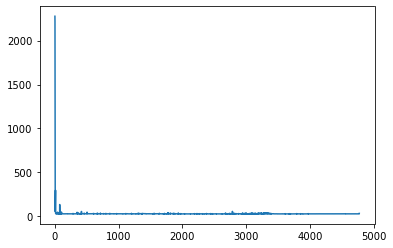

In [51]:
import matplotlib.pyplot as plt
df_GME=
plt.plot(df_GME.index,model.score_samples(df_GME))
plt.scatter(df_GME[df_GME['y']==-1].index,model.score_samples(df_GME)[df_GME[df_GME['y']==-1].index])


In [58]:
from sklearn.mixture import GaussianMixture

In [67]:
model=GaussianMixture()
df_GME=df_GME.drop(df_GME[['date']],axis=1)
model.fit(df_GME)

GaussianMixture()

In [68]:
y=model.predict(df_GME)

In [69]:
print(y)

[0 0 0 ... 0 0 0]


In [70]:
print(type(y))

<class 'numpy.ndarray'>


In [72]:
print(model.means_)

[[2.32010046e+01 2.36935900e+01 2.27143086e+01 2.31932338e+01
  3.39825481e+06 1.68828969e+01]]


In [74]:
model.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 1,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [77]:
model.means_

array([[2.32010046e+01, 2.36935900e+01, 2.27143086e+01, 2.31932338e+01,
        3.39825481e+06, 1.68828969e+01]])